# Flood prediction Model

In [344]:
#Import some basic libraries
import numpy as np
import pandas as pd

In [345]:
#Read the data present in dataset
data = pd.read_csv('kerala.csv')
df = pd.DataFrame(data)
#Using df.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


# Data Insight

In [346]:

# removing white space and adding '_' to column names
df.columns = df.columns.str.replace(' ', '_')
# changing the data from whole monthly average to the average rainfall in 3 hours in the month
df.JAN = df.JAN/248
df.FEB = df.FEB/224
df.MAR = df.MAR/248
df.APR = df.APR/240
df.MAY = df.MAY/248
df.JUN = df.JUN/240
df.JUL = df.JUL/248
df.AUG = df.AUG/248
df.SEP = df.SEP/240
df.OCT = df.OCT/248
df.NOV = df.NOV/240
df.DEC = df.DEC/248
df._ANNUAL_RAINFALL = df.JAN + df.FEB + df.MAR + df.APR + df.MAY + df.JUN + df.JUL + df.AUG + df.SEP + df.OCT + df.NOV + df.DEC
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,_ANNUAL_RAINFALL,FLOODS
0,KERALA,1901,0.115726,0.199554,0.208065,0.666667,0.704435,3.435833,2.995968,1.441532,0.823750,1.076210,1.461667,0.195161,13.324567,YES
1,KERALA,1902,0.027016,0.011607,0.231048,0.349583,0.542339,1.628750,4.858871,1.273387,2.048333,1.445161,0.659583,0.489919,13.565599,YES
2,KERALA,1903,0.012903,0.083036,0.012500,0.348333,1.006855,2.327500,4.122984,1.694355,1.424167,1.427823,0.654167,0.237903,13.352525,YES
3,KERALA,1904,0.095565,0.013393,0.129839,0.297917,0.950403,4.575833,2.925403,1.418548,0.927917,1.322984,0.141250,0.013306,12.812358,YES
4,KERALA,1905,0.004839,0.099554,0.037903,0.441250,1.061694,3.542500,2.098790,1.183871,0.905000,1.546371,0.310000,0.000806,11.232578,NO


In [347]:
# Now we will check if any colomns is left empty
df.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
_ANNUAL_RAINFALL    0
FLOODS              0
dtype: int64

In [348]:
# We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
df['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [349]:
# Let's see how are data looks like now
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,_ANNUAL_RAINFALL,FLOODS
0,KERALA,1901,0.115726,0.199554,0.208065,0.666667,0.704435,3.435833,2.995968,1.441532,0.823750,1.076210,1.461667,0.195161,13.324567,1
1,KERALA,1902,0.027016,0.011607,0.231048,0.349583,0.542339,1.628750,4.858871,1.273387,2.048333,1.445161,0.659583,0.489919,13.565599,1
2,KERALA,1903,0.012903,0.083036,0.012500,0.348333,1.006855,2.327500,4.122984,1.694355,1.424167,1.427823,0.654167,0.237903,13.352525,1
3,KERALA,1904,0.095565,0.013393,0.129839,0.297917,0.950403,4.575833,2.925403,1.418548,0.927917,1.322984,0.141250,0.013306,12.812358,1
4,KERALA,1905,0.004839,0.099554,0.037903,0.441250,1.061694,3.542500,2.098790,1.183871,0.905000,1.546371,0.310000,0.000806,11.232578,0


In [350]:
# Now let's seperate the data which we are gonna use for prediction
x = df.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,0.115726,0.199554,0.208065,0.666667,0.704435,3.435833,2.995968,1.441532,0.823750,1.076210,1.461667,0.195161
1,1902,0.027016,0.011607,0.231048,0.349583,0.542339,1.628750,4.858871,1.273387,2.048333,1.445161,0.659583,0.489919
2,1903,0.012903,0.083036,0.012500,0.348333,1.006855,2.327500,4.122984,1.694355,1.424167,1.427823,0.654167,0.237903
3,1904,0.095565,0.013393,0.129839,0.297917,0.950403,4.575833,2.925403,1.418548,0.927917,1.322984,0.141250,0.013306
4,1905,0.004839,0.099554,0.037903,0.441250,1.061694,3.542500,2.098790,1.183871,0.905000,1.546371,0.310000,0.000806


In [351]:
# Now seperate the flood label from the dataset
y = df.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

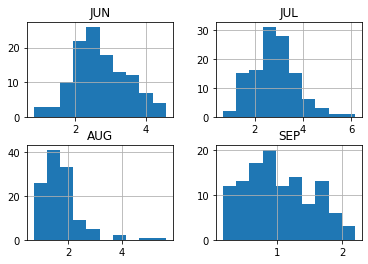

In [352]:
# Let's see how the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = df[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [353]:
# Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [354]:
# Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [355]:
# Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
70,1971,0.127419,0.082589,0.080645,0.470833,1.280242,3.706667,2.615323,1.553226,1.380000,0.890726,0.159583,0.251210
13,1914,0.002823,0.030357,0.072984,0.136250,0.662097,2.355417,3.458468,1.621774,1.004167,1.509677,0.420417,0.545161
107,2008,0.003226,0.135268,0.875806,0.451667,0.327419,1.957917,2.036694,1.407258,1.445833,1.384677,0.230833,0.068548
76,1977,0.004435,0.070089,0.114113,0.426250,1.235484,2.498333,3.037500,0.944355,0.838750,1.762097,1.507083,0.027016
39,1940,0.002419,0.006696,0.015323,0.527083,0.876613,2.526667,3.537500,2.462903,0.284167,1.039113,1.197917,0.242339


In [356]:
y_train.head()

70     1
13     0
107    0
76     1
39     1
Name: FLOODS, dtype: int64

# Prediction Algorithms:

# 1. KNN Classifier

In [357]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [358]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0]


In [359]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
21     1
15     1
17     0
38     1
104    1
30     1
91     1
102    0
42     1
73     0
95     0
115    0
80     1
86     0
63     0
60     1
34     0
114    0
52     0
26     1
49     1
109    1
117    1
67     1
Name: FLOODS, dtype: int64


In [360]:
from sklearn.model_selection import cross_val_score

In [361]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [362]:
knn_accuracy.mean()

0.4583333333333333

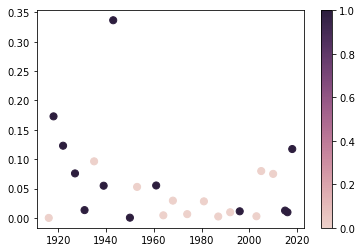

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
         x_test.iloc[:,0], x_test.iloc[:,1], c=y_predict, s=50, cmap=cmap
    )
f.colorbar(points)
plt.show()


# 2. Logistic Regression

In [364]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [365]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [366]:
lr_accuracy.mean()

0.7916666666666666

In [367]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1]


In [368]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1]


In [369]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 95.833333
recall score: 100.000000
roc score: 95.000000


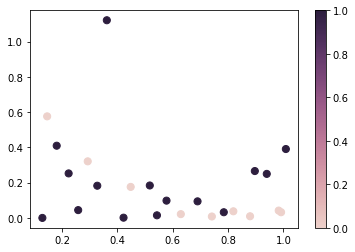

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_test_std[:, 0], x_test_std[:, 1], c=y_predict, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

# 3. Decision tree classification

In [371]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier(max_depth=3)
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc


array([0.625     , 0.64516129, 0.67741935])

In [372]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1]


In [373]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1]


In [374]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:75.000000
recall score:85.714286
roc score:72.857143


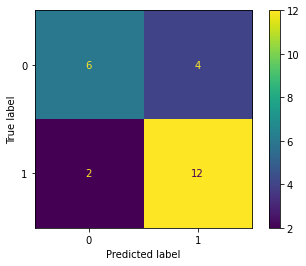

In [375]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_clf, x_test, y_test)
plt.show()

# 4. Random Forest Classification

In [376]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [377]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)

In [378]:
rmf_clf_acc

array([0.75      , 0.90322581, 0.77419355])

In [379]:
y_pred = rmf_clf.predict(x_test)

In [380]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:83.333333
recall score:85.714286
roc score:82.857143


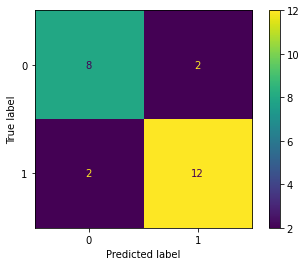

In [381]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rmf_clf, x_test, y_test)
plt.show()


# 5. Ensemble Learning

In [382]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')
voting_clf = voting.fit(x_train, y_train)


In [383]:
from sklearn.metrics import accuracy_score

scores = []
names = []

names.append('LR')
names.append('RFC')
names.append('KNN')
names.append('VC')
for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9166666666666666
RandomForestClassifier 0.7916666666666666
KNeighborsClassifier 0.5833333333333334
VotingClassifier 0.875


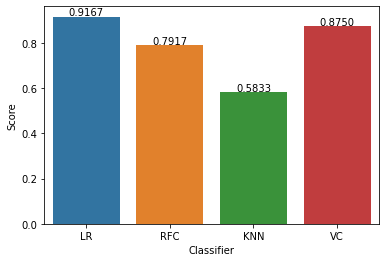

In [384]:
import seaborn as sns
tr = pd.DataFrame({'Name': names, 'Score': scores})
axis = sns.barplot(x='Name', y='Score', data=tr, dodge=False)
axis.set(xlabel='Classifier', ylabel='Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005,
              '{:1.4f}'.format(height), ha="center")
plt.show()

# Comparing all the prediction models

In [385]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
@ignore_warnings(category=ConvergenceWarning)
def my_function():
    models = []
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import VotingClassifier

    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('EL', VotingClassifier(
        estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
        voting='hard')))

    dual=True
    names = []
    scores = []
    for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        scores.append(accuracy_score(y_test, y_pred))
        names.append(name)
    tr_split = pd.DataFrame({'Name': names, 'Score': scores})
    print(tr_split)
    
my_function()

  Name     Score
0  KNN  0.583333
1   LR  0.875000
2   DT  0.708333
3   RF  0.875000
4   EL  0.875000


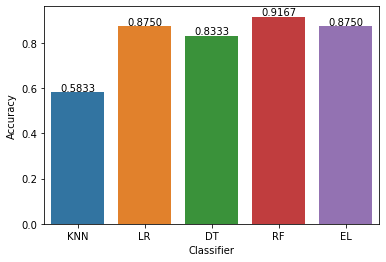

In [386]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# As we can observe and Compare different Models and Choose the best One to predict the situation based on the real time data